In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import requests
import json
from pprint import pprint

from urllib.error import HTTPError
import openweathermapy as ow
import time

# Import API key
from api_keys import api_key


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Getting Captial Cities from World Bank API

In [4]:
url = "http://api.worldbank.org/v2/"
format = "json"
page = 304

print(f"{url}countries?format={format}&per_page={page}")
countryjson1 = requests.get(f"{url}countries?format={format}&per_page={page}").json()
pprint(countryjson1)

http://api.worldbank.org/v2/countries?format=json&per_page=304
[{'page': 1, 'pages': 1, 'per_page': '304', 'total': 304},
 [{'adminregion': {'id': '', 'iso2code': '', 'value': ''},
   'capitalCity': 'Oranjestad',
   'id': 'ABW',
   'incomeLevel': {'id': 'HIC', 'iso2code': 'XD', 'value': 'High income'},
   'iso2Code': 'AW',
   'latitude': '12.5167',
   'lendingType': {'id': 'LNX', 'iso2code': 'XX', 'value': 'Not classified'},
   'longitude': '-70.0167',
   'name': 'Aruba',
   'region': {'id': 'LCN',
              'iso2code': 'ZJ',
              'value': 'Latin America & Caribbean '}},
  {'adminregion': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'},
   'capitalCity': 'Kabul',
   'id': 'AFG',
   'incomeLevel': {'id': 'LIC', 'iso2code': 'XM', 'value': 'Low income'},
   'iso2Code': 'AF',
   'latitude': '34.5228',
   'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'},
   'longitude': '69.1761',
   'name': 'Afghanistan',
   'region': {'id': 'SAS', 'iso2code': '8S', 'value

                   'value': 'Sub-Saharan Africa (excluding high income)'},
   'capitalCity': 'Asmara',
   'id': 'ERI',
   'incomeLevel': {'id': 'LIC', 'iso2code': 'XM', 'value': 'Low income'},
   'iso2Code': 'ER',
   'latitude': '15.3315',
   'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'},
   'longitude': '38.9183',
   'name': 'Eritrea',
   'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}},
  {'adminregion': {'id': '', 'iso2code': '', 'value': ''},
   'capitalCity': 'Madrid',
   'id': 'ESP',
   'incomeLevel': {'id': 'HIC', 'iso2code': 'XD', 'value': 'High income'},
   'iso2Code': 'ES',
   'latitude': '40.4167',
   'lendingType': {'id': 'LNX', 'iso2code': 'XX', 'value': 'Not classified'},
   'longitude': '-3.70327',
   'name': 'Spain',
   'region': {'id': 'ECS', 'iso2code': 'Z7', 'value': 'Europe & Central Asia'}},
  {'adminregion': {'id': '', 'iso2code': '', 'value': ''},
   'capitalCity': 'Tallinn',
   'id': 'EST',
   'incomeLevel': {'id': 'HIC

   'incomeLevel': {'id': 'LMC',
                   'iso2code': 'XN',
                   'value': 'Lower middle income'},
   'iso2Code': 'NG',
   'latitude': '9.05804',
   'lendingType': {'id': 'IDB', 'iso2code': 'XH', 'value': 'Blend'},
   'longitude': '7.48906',
   'name': 'Nigeria',
   'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}},
  {'adminregion': {'id': 'LAC',
                   'iso2code': 'XJ',
                   'value': 'Latin America & Caribbean (excluding high '
                            'income)'},
   'capitalCity': 'Managua',
   'id': 'NIC',
   'incomeLevel': {'id': 'LMC',
                   'iso2code': 'XN',
                   'value': 'Lower middle income'},
   'iso2Code': 'NI',
   'latitude': '12.1475',
   'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'},
   'longitude': '-86.2734',
   'name': 'Nicaragua',
   'region': {'id': 'LCN',
              'iso2code': 'ZJ',
              'value': 'Latin America & Caribbean '}},
  {'adm

In [5]:
alldata = countryjson1[1]

In [6]:
len(alldata)

304

In [7]:
countries = []
regions = []
capitalcities = []
incomelevels = []
lats = []
lngs = []


In [8]:

for each in alldata:
    name = each["name"]
    countries.append(name)
    region = each["region"]["value"]
    regions.append(region)
    capital = each["capitalCity"]
    capitalcities.append(capital)
    income = each["incomeLevel"]["value"]
    incomelevels.append(income)
    lat = each["latitude"]
    lats.append(lat)
    lng = each["longitude"]
    lngs.append(lng)
    

In [9]:
wbdata = pd.DataFrame({"Country":countries, "Region":regions, 
                       "Capital":capitalcities, "Incomelevel":incomelevels,
                       "Lat":lats, "Lng":lngs})
wbdata.head()

,Country,Region,Capital,Incomelevel,Lat,Lng
0,Aruba,Latin America & Caribbean,Oranjestad,High income,12.5167,-70.0167
1,Afghanistan,South Asia,Kabul,Low income,34.5228,69.1761
2,Africa,Aggregates,,Aggregates,,
3,Angola,Sub-Saharan Africa,Luanda,Lower middle income,-8.81155,13.242
4,Albania,Europe & Central Asia,Tirane,Upper middle income,41.3317,19.8172


In [10]:
outputfile = wbdata.to_csv("wbdatafullset.csv", encoding="utf-8", index=False)

In [11]:
# Merging with Happiness2019 Data 

In [12]:
capital = pd.read_csv("wbdatafullset.csv")
happiness = pd.read_csv("Happiness2019.csv")


In [13]:
capital.head()


,Country,Region,Capital,Incomelevel,Lat,Lng
0,Aruba,Latin America & Caribbean,Oranjestad,High income,12.51670,-70.0167
1,Afghanistan,South Asia,Kabul,Low income,34.52280,69.1761
2,Africa,Aggregates,NaN,Aggregates,NaN,NaN
3,Angola,Sub-Saharan Africa,Luanda,Lower middle income,-8.81155,13.2420
4,Albania,Europe & Central Asia,Tirane,Upper middle income,41.33170,19.8172


In [14]:
happiness.head()

,Country,Ladder
0,Finland,1
1,Denmark,2
2,Norway,3
3,Iceland,4
4,Netherlands,5


In [15]:
mergedf = pd.merge(happiness, capital, on="Country", how="left")
mergedf.head()

,Country,Ladder,Region,Capital,Incomelevel,Lat,Lng
0,Finland,1,Europe & Central Asia,Helsinki,High income,60.1608,24.95250
1,Denmark,2,Europe & Central Asia,Copenhagen,High income,55.6763,12.56810
2,Norway,3,Europe & Central Asia,Oslo,High income,59.9138,10.73870
3,Iceland,4,Europe & Central Asia,Reykjavik,High income,64.1353,-21.89520
4,Netherlands,5,Europe & Central Asia,Amsterdam,High income,52.3738,4.89095


In [16]:
mergedf.count()

Country        156
Ladder         156
Region         135
Capital        134
Incomelevel    135
Lat            135
Lng            135
dtype: int64

In [17]:
mergedf2 = mergedf.dropna(how="any")
mergedf2.count()

Country        134
Ladder         134
Region         134
Capital        134
Incomelevel    134
Lat            134
Lng            134
dtype: int64

In [18]:
# Exporting the Outputfile

In [19]:
outputfile = mergedf2.to_csv("capitalmergedwb.csv", encoding="utf-8", index=False)


In [20]:
mergedf2.head()

,Country,Ladder,Region,Capital,Incomelevel,Lat,Lng
0,Finland,1,Europe & Central Asia,Helsinki,High income,60.1608,24.95250
1,Denmark,2,Europe & Central Asia,Copenhagen,High income,55.6763,12.56810
2,Norway,3,Europe & Central Asia,Oslo,High income,59.9138,10.73870
3,Iceland,4,Europe & Central Asia,Reykjavik,High income,64.1353,-21.89520
4,Netherlands,5,Europe & Central Asia,Amsterdam,High income,52.3738,4.89095


In [21]:
# Getting the Weather Data from OWM API 

In [22]:
# Starting URL for Weather Map API Call
baseurl = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


# create setting and desired_keys
settings = {'units':'Imperial','appid':api_key}
summary = ['sys.country','main.temp_max','main.temp_min']


In [23]:
capitals = mergedf2["Capital"].tolist()
capitals

['Helsinki',
 'Copenhagen',
 'Oslo',
 'Reykjavik',
 'Amsterdam',
 'Bern',
 'Stockholm',
 'Wellington',
 'Ottawa',
 'Vienna',
 'Canberra',
 'San Jose',
 'Luxembourg',
 'London',
 'Dublin',
 'Berlin',
 'Brussels',
 'Washington D.C.',
 'Prague',
 'Abu Dhabi',
 'Valletta',
 'Mexico City',
 'Paris',
 'Santiago',
 'Guatemala City',
 'Riyadh',
 'Doha',
 'Madrid',
 'Panama City',
 'Brasilia',
 'Montevideo',
 'Singapore',
 'San Salvador',
 'Rome',
 'Manama',
 'Port-of-Spain',
 'Warsaw',
 'Tashkent',
 'Vilnius',
 'Bogota',
 'Ljubljana',
 'Managua',
 'Pristina',
 'Buenos Aires',
 'Bucharest',
 'Nicosia',
 'Quito',
 'Kuwait City',
 'Bangkok',
 'Riga',
 'Tallinn',
 'Kingston',
 'Port Louis',
 'Tokyo',
 'Tegucigalpa',
 'Astana',
 'La Paz',
 'Budapest',
 'Asuncion',
 'Lima',
 'Lisbon',
 'Islamabad',
 'Manila',
 'Belgrade',
 'Chisinau',
 'Tripoli',
 'Podgorica',
 'Dushanbe',
 'Zagreb',
 'Santo Domingo',
 'Ankara',
 'Kuala Lumpur',
 'Minsk',
 'Athens',
 'Ulaanbaatar',
 'Abuja',
 'Ashgabat',
 'Algiers',

In [24]:
countries = []
maxtemp = []
mintemp = []
citylist = []


In [25]:
counter = 1
for capital in capitals:
    capitalurl = f"{baseurl}&q={capital}"
    print(f"Processing Captial City # {counter} / {capital}")
    try:
        capitaljson = ow.get_current(capital, **settings)
        capitaldata = capitaljson(*summary)
        countries.append(capitaldata[0])
        maxtemp.append(capitaldata[1])
        mintemp.append(capitaldata[2])
        citylist.append(capital)
    except HTTPError:
        print('Capital not found. Skipping..')
    
    counter += 1 

print("Data Retrieval Complete")
    

Processing Captial City # 1 / Helsinki
Processing Captial City # 2 / Copenhagen
Processing Captial City # 3 / Oslo
Processing Captial City # 4 / Reykjavik
Processing Captial City # 5 / Amsterdam
Processing Captial City # 6 / Bern
Processing Captial City # 7 / Stockholm
Processing Captial City # 8 / Wellington
Processing Captial City # 9 / Ottawa
Processing Captial City # 10 / Vienna
Processing Captial City # 11 / Canberra
Processing Captial City # 12 / San Jose
Processing Captial City # 13 / Luxembourg
Processing Captial City # 14 / London
Processing Captial City # 15 / Dublin
Processing Captial City # 16 / Berlin
Processing Captial City # 17 / Brussels
Processing Captial City # 18 / Washington D.C.
Capital not found. Skipping..
Processing Captial City # 19 / Prague
Processing Captial City # 20 / Abu Dhabi
Processing Captial City # 21 / Valletta
Processing Captial City # 22 / Mexico City
Processing Captial City # 23 / Paris
Processing Captial City # 24 / Santiago
Processing Captial Cit

In [26]:
weatherdf = pd.DataFrame({"Capital":citylist, "Country":countries, 
                          "Max Temp":maxtemp, "Min Temp":mintemp})
weatherdf.count()


Capital     130
Country     130
Max Temp    130
Min Temp    130
dtype: int64

In [27]:
weatherdf1 = weatherdf.dropna(how="any")
weatherdf1.count()

Capital     130
Country     130
Max Temp    130
Min Temp    130
dtype: int64

In [28]:
weatherdf1.head()

,Capital,Country,Max Temp,Min Temp
0,Helsinki,FI,46.99,39.00
1,Copenhagen,DK,60.01,50.00
2,Oslo,NO,59.00,50.00
3,Reykjavik,IS,55.99,52.00
4,Amsterdam,NL,64.00,55.99


In [29]:
# Merging files

In [30]:
mergedweather = pd.merge(mergedf2,weatherdf1, on="Capital", how="inner")
mergedweather.head()

,Country_x,Ladder,Region,Capital,Incomelevel,Lat,Lng,Country_y,Max Temp,Min Temp
0,Finland,1,Europe & Central Asia,Helsinki,High income,60.1608,24.95250,FI,46.99,39.00
1,Denmark,2,Europe & Central Asia,Copenhagen,High income,55.6763,12.56810,DK,60.01,50.00
2,Norway,3,Europe & Central Asia,Oslo,High income,59.9138,10.73870,NO,59.00,50.00
3,Iceland,4,Europe & Central Asia,Reykjavik,High income,64.1353,-21.89520,IS,55.99,52.00
4,Netherlands,5,Europe & Central Asia,Amsterdam,High income,52.3738,4.89095,NL,64.00,55.99


In [31]:
# Build Scatter plots

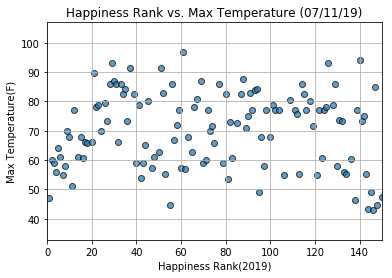

In [35]:
# Build a scatter plot and save figure

plt.scatter(mergedweather["Ladder"], mergedweather["Max Temp"], edgecolor="black", alpha=0.7)
plt.xlim(0,150)
plt.ylim(min(mergedweather["Max Temp"])-10, max(mergedweather["Max Temp"]+10))
plt.grid()

plt.title(f"Happiness Rank vs. Max Temperature ({time.strftime('%m/%d/%y')})")
plt.xlabel("Happiness Rank(2019)")
plt.ylabel("Max Temperature(F)")

plt.savefig("happpinessvsmaxtemp")
plt.show()


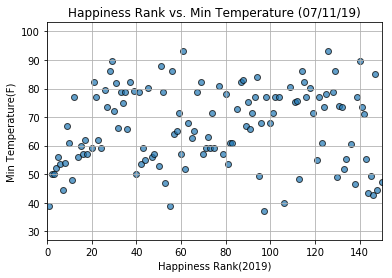

In [36]:
# Build a scatter plot and save figure

plt.scatter(mergedweather["Ladder"], mergedweather["Min Temp"], edgecolor="black", alpha=0.7)
plt.xlim(0,150)
plt.ylim(min(mergedweather["Min Temp"])-10, max(mergedweather["Min Temp"]+10))
plt.grid()

plt.title(f"Happiness Rank vs. Min Temperature ({time.strftime('%m/%d/%y')})")
plt.xlabel("Happiness Rank(2019)")
plt.ylabel("Min Temperature(F)")

plt.savefig("happinessvsmintemp")
plt.show()

In [38]:
maxtempcorr = np.corrcoef(mergedweather["Ladder"], mergedweather["Max Temp"])
maxtempcorr

array([[ 1.        , -0.06572515],
       [-0.06572515,  1.        ]])

In [39]:
mintempcorr = np.corrcoef(mergedweather["Ladder"], mergedweather["Min Temp"])
mintempcorr

array([[1.        , 0.06820241],
       [0.06820241, 1.        ]])

In [40]:
ouputfile = mergedweather.to_csv("mergedweather0711.csv", encoding="utf-8", index=False)


In [41]:
# The END 